Solve to reduce the number of variables describing the three categories of wines. To verify the effectiveness of the reduction, build a classifier that allows you to assign new cases to one of the three groups of wines for the original variables and for the new principal components. Use one of the three algorithms:
- k-nearest neighbor;
- decision trees;
- naive Bayesian classifier.

### Imports

In [1]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from plotnine import *
from numpy.linalg import eig
from sklearn import metrics
import seaborn as sns; sns.set_theme()

### Data import

In [2]:
satysf= pd.read_csv('wina.csv', sep = ',', decimal = '.')
X = satysf[satysf.columns[:-1]]
y = satysf[satysf.columns[-1]]
satysf

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


### Standarization

In [3]:
from sklearn.preprocessing import StandardScaler

sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)

## Correlation matrix

In [4]:
pd.DataFrame(X).corr()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## Dividing set into a training set and a test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Classification with naive Bayes classifier of unaltered data set

In [7]:
from sklearn.naive_bayes import GaussianNB
gm = GaussianNB()
gm.fit(X_train, y_train)
print("The result for the training set:", gm.score(X_train, y_train))

The result for the training set: 0.9919354838709677


              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.92      0.92      0.92        26
           3       0.88      1.00      0.93        14

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



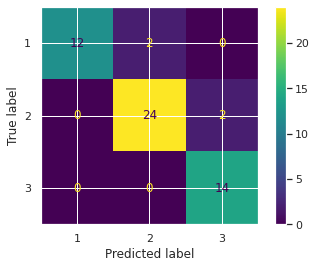

In [8]:
y_pred = gm.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3])
cm_display.plot()
plt.show()

###### The classifier built on the training set, tested on the test set gives an accuracy of 93%. This shows that the classifier works quite well, as out of 54 objects, only 4 were misclassified.

## PCA

In [9]:
from sklearn.decomposition import PCA

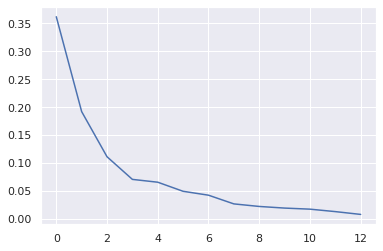

In [10]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)

From the graph of the sludge, it seems that it is enough to take already 3 components.

The coefficients in each component stay the same, no matter how many principal components we choose. So only one table with coefficients is displayed. \


In [11]:
count_pc = 13
bench = pca.components_[:count_pc].T
component = ["PC"+str(i) for i in range(1, count_pc+1)]
bench_df = pd.DataFrame(bench, columns = component,
                        index=satysf.columns[:-1])
bench_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
x1,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
x2,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
x3,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
x4,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
x5,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
x6,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
x7,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
x8,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
x9,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
x10,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


## Verification of the effectiveness of classifier-based dimension reduction for different number of principal components

Accuracy of the classifier on the training set:  0.8145161290322581  for a number of components equal to 1
              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.89      0.76      0.82        21
           3       0.92      1.00      0.96        12

    accuracy                           0.87        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.87      0.87      0.87        54



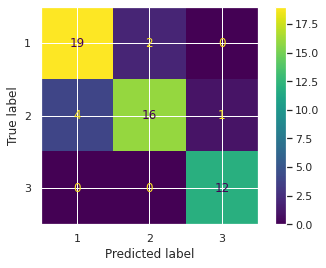

Accuracy of the classifier on the training set:  0.967741935483871  for a number of components equal to 2
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        16

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



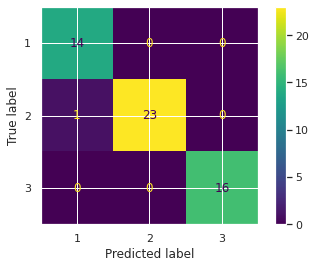

Accuracy of the classifier on the training set:  0.9838709677419355  for a number of components equal to 3
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.92      0.96      0.94        24
           3       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



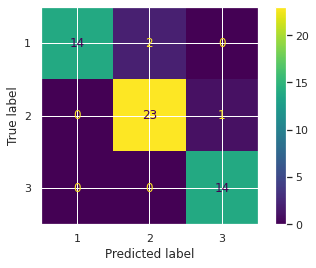

Accuracy of the classifier on the training set:  0.9838709677419355  for a number of components equal to 4
              precision    recall  f1-score   support

           1       1.00      0.74      0.85        19
           2       0.79      0.95      0.86        20
           3       0.94      1.00      0.97        15

    accuracy                           0.89        54
   macro avg       0.91      0.90      0.89        54
weighted avg       0.91      0.89      0.89        54



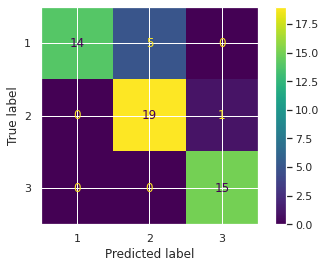

Accuracy of the classifier on the training set:  0.967741935483871  for a number of components equal to 5
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        23

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



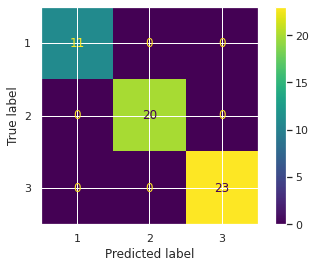

Accuracy of the classifier on the training set:  1.0  for a number of components equal to 6
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.96      0.98        24
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



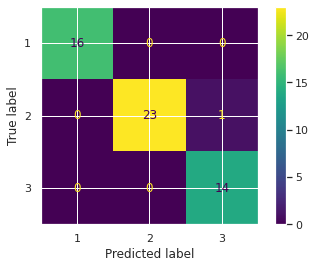

Accuracy of the classifier on the training set:  0.9838709677419355  for a number of components equal to 7
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        20
           2       0.92      1.00      0.96        22
           3       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



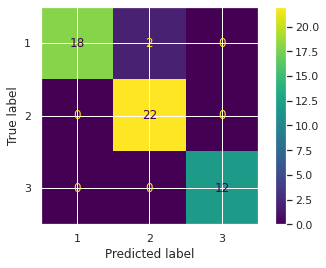

Accuracy of the classifier on the training set:  0.9838709677419355  for a number of components equal to 8
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



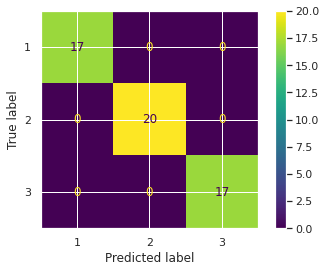

Accuracy of the classifier on the training set:  0.9838709677419355  for a number of components equal to 9
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.96      1.00      0.98        23
           3       1.00      0.94      0.97        18

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



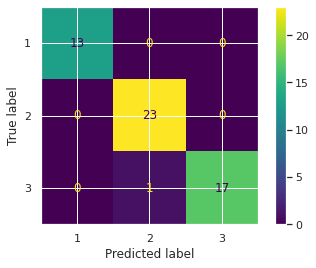

Accuracy of the classifier on the training set:  0.9919354838709677  for a number of components equal to 10
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.95      0.95      0.95        22
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



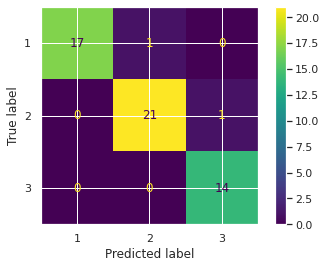

Accuracy of the classifier on the training set:  0.9919354838709677  for a number of components equal to 11
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        10

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



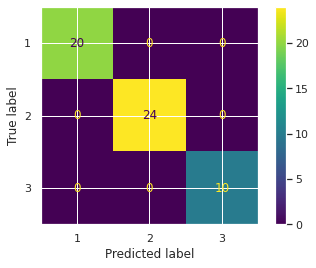

Accuracy of the classifier on the training set:  0.9838709677419355  for a number of components equal to 12
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



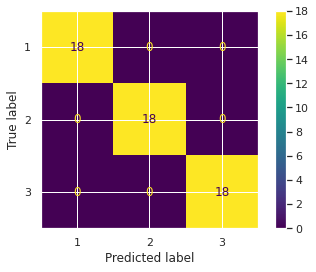

Accuracy of the classifier on the training set:  0.9919354838709677  for a number of components equal to 13
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.96      0.98        23
           3       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



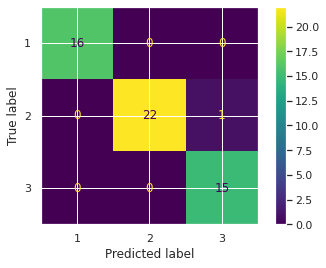

In [12]:
for n in range (1,14):
  count_pc = n
  bench = pca.components_[:count_pc].T
  component = ["PC"+str(i) for i in range(1, count_pc+1)]
  bench_df = pd.DataFrame(bench, columns = component, index=satysf.columns[:-1])
  X_PCA = pca.transform(X)
  X_PCAn = X_PCA[:,0:count_pc]
  X_PCAn_train, X_PCAn_test, y_PCAn_train, y_PCAn_test = train_test_split(X_PCAn, y, test_size=0.30)
  gm2 = GaussianNB()
  gm2.fit(X_PCAn_train, y_PCAn_train)
  print("Accuracy of the classifier on the training set: ", gm2.score(X_PCAn_train, y_PCAn_train), " for a number of components equal to", n)
  y_PCAn_pred = gm2.predict(X_PCAn_test)
  print(classification_report(y_PCAn_test, y_PCAn_pred))
  confusion_matrix = metrics.confusion_matrix(y_PCAn_test,y_PCAn_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1,2,3])
  cm_display.plot()
  plt.show()





I received the following results:
- for one head component accuracy = 87%. 
Such accuracy is quite high considering that we reduce the size of the base by 92%

- for two principal components accuracy = 98%
The resulting base is 15% of the initial base, and in addition, the accuracy of the classifier is 
even better for two components.

- for three principal components accuracy = 94%

Analysis can be carried out for each of the components.

It follows from the above that the reduction of dimensions will not adversely affect the results obtained, provided that the number of components is greater than 1.

However, one must keep in mind that there are 178 objects in the set, and it is a set that was probably created to give good results in classifications and other operations on the set.\
 You have to reckon with the fact that performing such calculations on other, real-world sets, the classification accuracy will not be as good.